# Homework 2: Problems
## Due Friday 26 October

### PHYS T480/580, Fall 2018
https://github.com/gtrichards/PHYS_T480_F18/


## Problem 1  (50 points)
On Data Camp:

Statistical Thinking in Python (Part 2): Bootstrap confidence intervals 

This is Chapter 2.  You shouldn't need Chapter 1, but you are welcome to do it.  If this chapter interests you, then you might get something out of completing Chapters 3 and 4 as well.

## Problem 2 (25 points)
Repeat the simple MLE example from class (Inference2.ipynb), but with 2 changes.  First allow for a variable number of data points (and show for `N=3` and `N=10`.  Second, limit the range of valid solutions for $\mu$ to $\mu>1.1$ (just for `N=10`).  How does that affect your results?  Use a random seed of 42 for all.


## Problem 3 (25 points)

Produce the "trace" plot for the clear/cloudy day problem from Inference2.ipynb.  Then plot the histogram of that trace, throwing away steps in the trace that could be considered part of the burn-in.  Your plots should look like the ones from class (or nicer!).  Confirm that you get the same answer for day $N$ as day $N+1$ and it doesn't matter whether is was clear or cloudy on the day that you started. 

In [1]:
# %matplotlib inline
from enum import Enum
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import stats
import astroML.plotting as amplt 
import warnings

In [2]:
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (17.0, 5.0)
np.random.seed(42)

# Begin Solutions
## Problem 2 (25 points)
Repeat the simple MLE example from class (Inference2.ipynb), but with 2 changes.  First allow for a variable number of data points (and show for `N=3` and `N=10`.  Second, limit the range of valid solutions for $\mu$ to $\mu>1.1$ (just for `N=10`).  How does that affect your results?  Use a random seed of 42 for all.

In [3]:
def test_mle(mu=1,sigma=0.2,N=3,samples=1000):
    llim = mu-4*sigma; ulim = mu+4*sigma
    xvals = np.linspace(llim,ulim,samples)
    sample_vals = sp.stats.norm(mu,sigma).rvs(N)
    prod = np.ones(samples)
    for i,rv in enumerate(sample_vals):
        gauss_pdf = np.array(sp.stats.norm.pdf(xvals,rv,sigma))
        prod *= gauss_pdf
        plt.plot(xvals,gauss_pdf,label=fr'$L_{i}(x_1)$')
    
    max_at = np
    plt.plot(xvals,prod,label='L({x})')
    plt.legend()

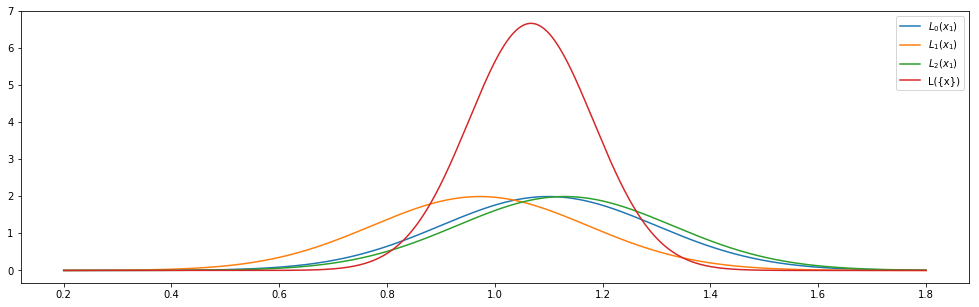

In [4]:
test_mle(N=3)

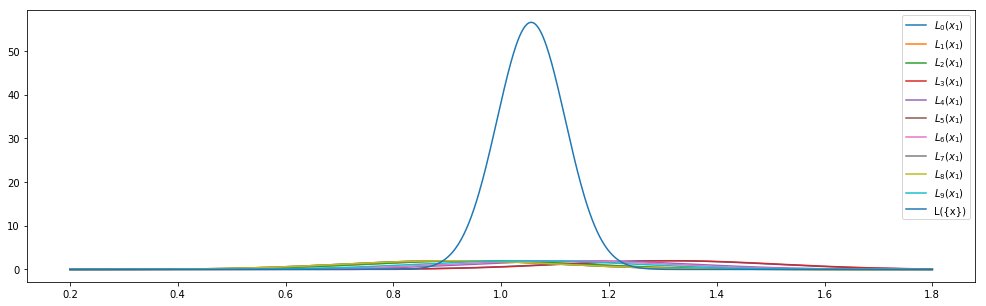

In [5]:
test_mle(N=10)

## Problem 3 (25 points)

Produce the "trace" plot for the clear/cloudy day problem from Inference2.ipynb.  Then plot the histogram of that trace, throwing away steps in the trace that could be considered part of the burn-in.  Your plots should look like the ones from class (or nicer!).  Confirm that you get the same answer for day $N$ as day $N+1$ and it doesn't matter whether is was clear or cloudy on the day that you started. 

In [6]:
class Weather(Enum):
    CLOUDY = 0
    CLEAR  = 1

Clear probability for last two days are [0.8306661332266453, 0.8305830583058306]


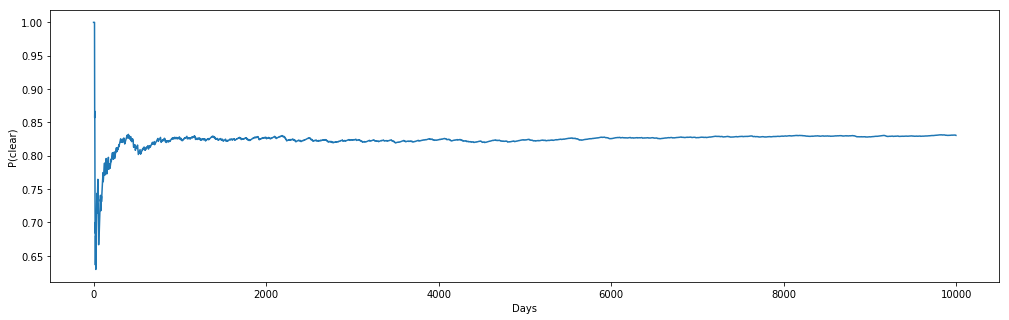

In [7]:
start_with =  Weather.CLEAR
weather_progression = [start_with] # first day of weather

total_days = 10_000

for day in range(total_days):
    toss = np.random.random(1)
    # last value of the weather_progression is today's predicted yesterday
    today = weather_progression[-1]
    tomorrow = None # We don't know tomorrow's weather yet, lets find out
    
    # tomorrow will be cloudy if and only if 
    # i)  today is clear and toss gives < 0.1 or
    # ii) today is cloudy and toss gives < 0.5
    # tomorrow = Weather.CLOUDY if (today == Weather.CLEAR and toss < 0.1) or (today == Weather.CLOUDY and toss < 0.5) else Weather.CLEAR  
    # Lets write extended if else for clarity
    
    if today == Weather.CLOUDY:
        if toss <= 0.5:
            tomorrow = Weather.CLEAR
        else:
            tomorrow = Weather.CLOUDY
    elif today == Weather.CLEAR:
        if toss <=.1:
            tomorrow = Weather.CLOUDY
        else:
            tomorrow = Weather.CLEAR
            
    weather_progression.append(tomorrow)

# take first x values for weather_progression, count clear days, divide by no of days
clear_prob = [weather_progression[:x].count(Weather.CLEAR)/x for x in range(1,total_days)]
print(f'Clear probability for last two days are {clear_prob[-2:]}')
    
plt.xlabel('Days')
plt.ylabel('P(clear)')
plt.plot(clear_prob)
plt.show()

Clear probabilities for last two days are almost equal meaning that N or N+1 doesn't change the result

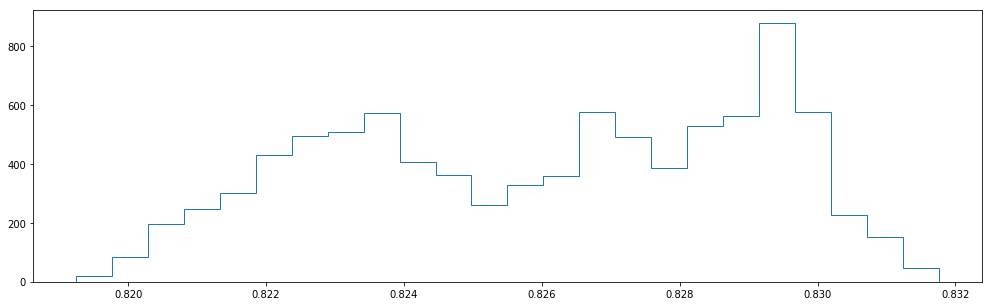

In [8]:
# lets burn the first 1000 days
burn_days = 1000
setteled_clear = clear_prob[burn_days:]
___ = amplt.hist(setteled_clear, bins='freedman',histtype='step')